In [1]:
import os,sys,time
smodelsPath = os.path.expanduser('~/smodels')
sys.path.append(smodelsPath)
from smodels.experiment.databaseObj import Database
from smodels.tools.physicsUnits import GeV
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))
cm = plt.cm.get_cmap('RdYlBu')

In [2]:
db = Database(os.path.expanduser('~/smodels-database'))

In [3]:
exp = db.getExpResults(analysisIDs = 'CMS-EXO-13-006-trim', dataTypes = 'efficiencyMap')[0]
print(exp)

CMS-EXO-13-006-trim: c000,c100,c200,c300(4):THSCPM1b,THSCPM2b,THSCPM3,THSCPM4,THSCPM5,THSCPM6,THSCPM7,THSCPM8,THSCPM9(9)


In [9]:
t0 = time.time()
datasetNames = ['c000','c100','c200','c300']
txNames = ['THSCPM1b']

mass = [[(55.0*GeV,1e-21*GeV)]]*2
for tx in txNames:
    for ds in datasetNames:
        dataset = [dds for dds in exp.datasets if dds.dataInfo.dataId == ds][0]
        txname = [t for t in dataset.txnameList if t.txName == tx][0]
        effInterp = txname.txnameData.getValueFor(mass)
        print(tx,ds,'eff= %1.2e' %effInterp)

THSCPM1b c000 eff= 8.38e-04
THSCPM1b c100 eff= 0.00e+00
THSCPM1b c200 eff= 0.00e+00
THSCPM1b c300 eff= 0.00e+00


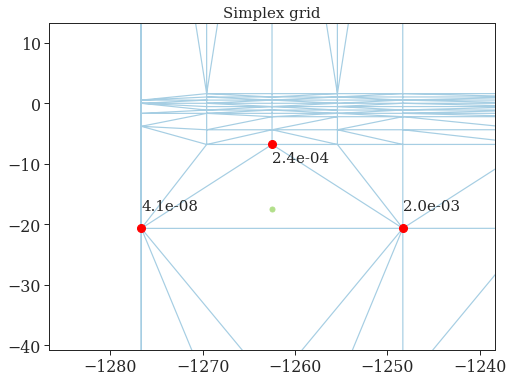

In [10]:
#Plot simplex grid:
ds = [d for d in exp.datasets if d.dataInfo.dataId == 'c000'][0]
txname = [t for t in ds.txnameList if t.txName == 'THSCPM1b'][0]
tx = txname.txnameData
plt.figure(figsize=(8,6))
plt.triplot(tx.tri.points[:,0], tx.tri.points[:,1], tx.tri.simplices.copy())

#Convert mass point to simplex coordinates:
pointA = tx.dataToCoordinates(mass,rotMatrix=tx._V,
                                  transVector=tx.delta_x)
pontA = pointA[:2] #reduce dimension

#Get simplex containing the point:
simplexA = tx.tri.find_simplex(pointA[:2], tol=1e-8)
#Get the list of vertices fro the simplex:
verticesA = tx.tri.simplices[simplexA]
#Get the points corresponding to the vertices:
simplexPointsA = np.array([tx.tri.points[iv] for iv in verticesA])
#Get the efficiencies corresponding to the vertices:
simplexEffs = np.array([tx.y_values[iv] for iv in verticesA])

xmax = simplexPointsA[:,0].max()
xmin = simplexPointsA[:,0].min()
ymax = simplexPointsA[:,1].max()
ymin = simplexPointsA[:,1].min()


plt.plot(pointA[0],pointA[1],'o',markersize=5)
plt.plot(simplexPointsA[:,0],simplexPointsA[:,1],'o',markersize=8,color='red')
for i,pt in enumerate(simplexPointsA):
    plt.annotate('%1.1e'%simplexEffs[i],(pt[0],pt[1]+3.*(-1)**i),fontsize=15)

plt.title("Simplex grid", fontsize=15)
plt.ylim(ymin-20,ymax+20)
plt.xlim(xmin-10,xmax+10)
plt.show()

In [35]:
for pt in simplexPointsA:
    print(tx.coordinatesToData(pt,rotMatrix=tx._V,
                                  transVector=tx.delta_x))

[[(5.00E+01 [GeV], -1.42E-44 [GeV])], [(5.00E+01 [GeV], -1.42E-44 [GeV])]]
[[(7.50E+01 [GeV], -7.11E-45 [GeV])], [(7.50E+01 [GeV], -7.11E-45 [GeV])]]
[[(5.00E+01 [GeV], 1.00E+06 [GeV])], [(5.00E+01 [GeV], 1.00E+06 [GeV])]]


In [8]:
simplexEffs

array([0., 0., 0.])

In [43]:
np.log(1.0+(1.0e-40/1e-30))

1.000000082690371e-10